<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/pipeline_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#EDA

In [106]:
df.shape

(1000, 16)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [108]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [109]:
df.nunique()

,0
student_id,1000
age,8
gender,3
study_hours_per_day,78
social_media_hours,60
netflix_hours,51
part_time_job,2
attendance_percentage,320
sleep_hours,68
diet_quality,3


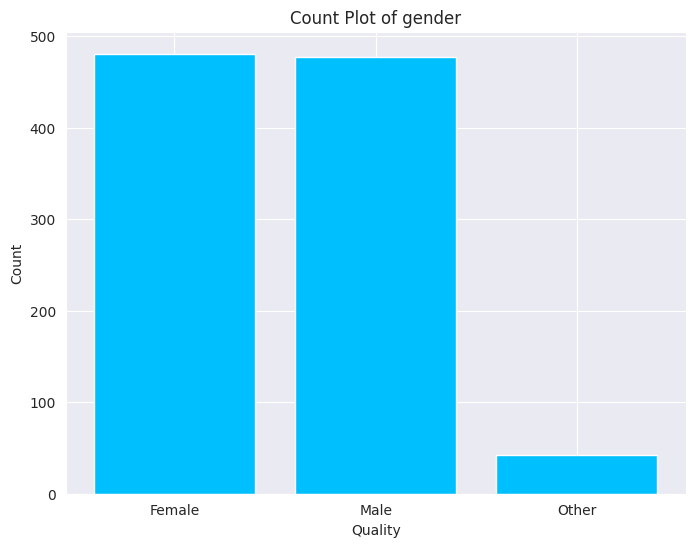

In [110]:
quality_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='deepskyblue')
plt.title('Count Plot of gender')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

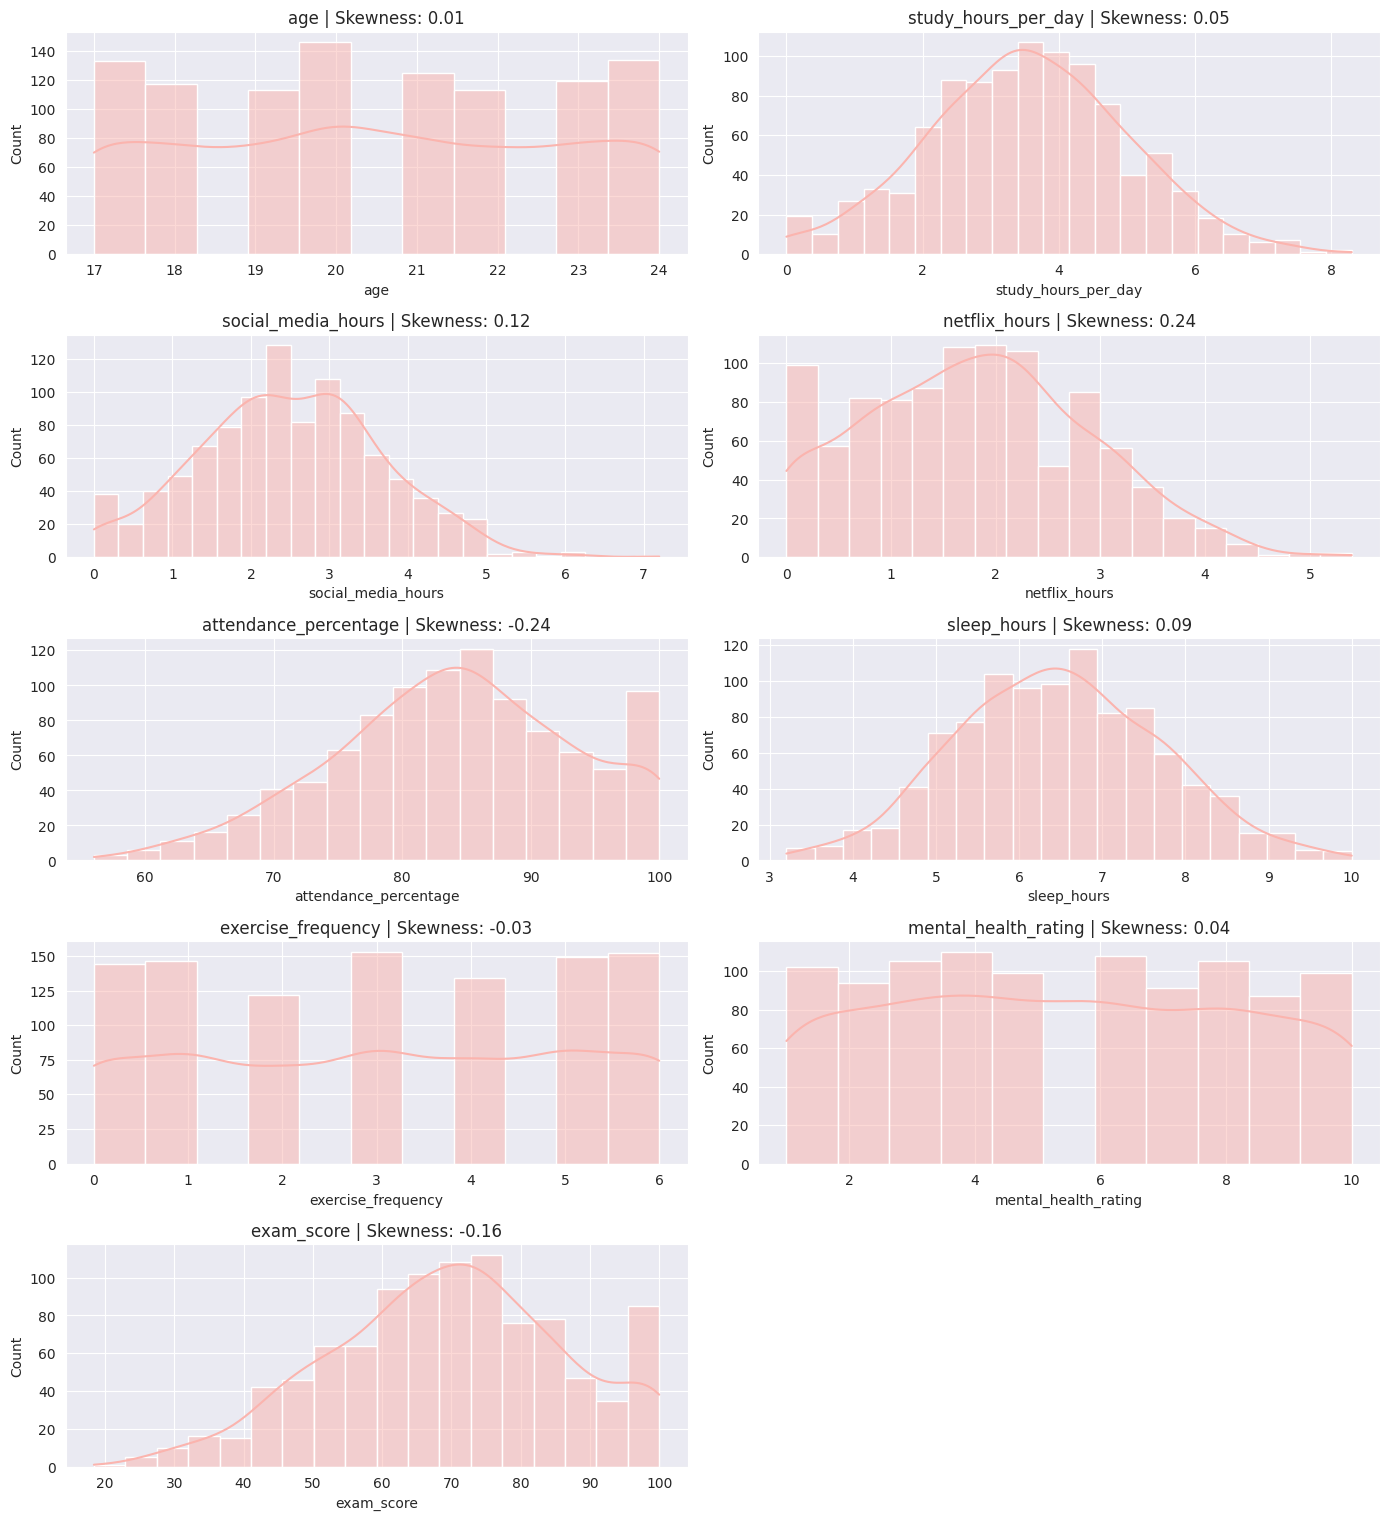

In [111]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

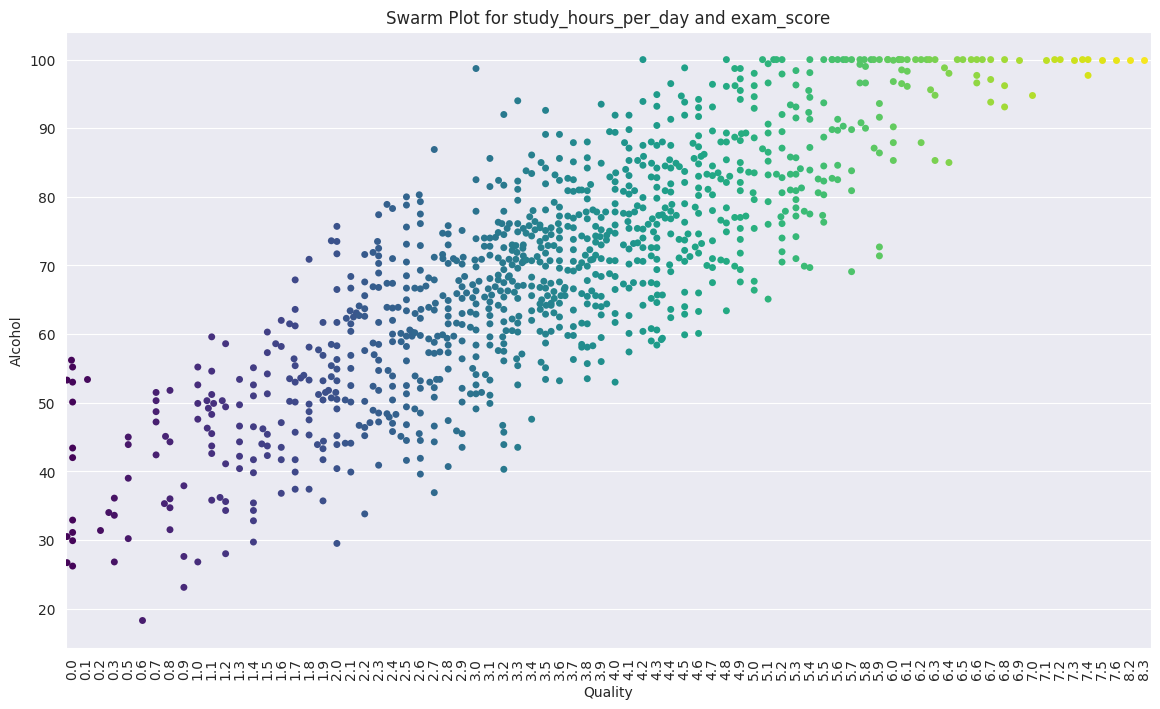

In [112]:
plt.figure(figsize=(14, 8))

sns.swarmplot(x="study_hours_per_day", y="exam_score", data=df, palette='viridis')

plt.title('Swarm Plot for study_hours_per_day and exam_score')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

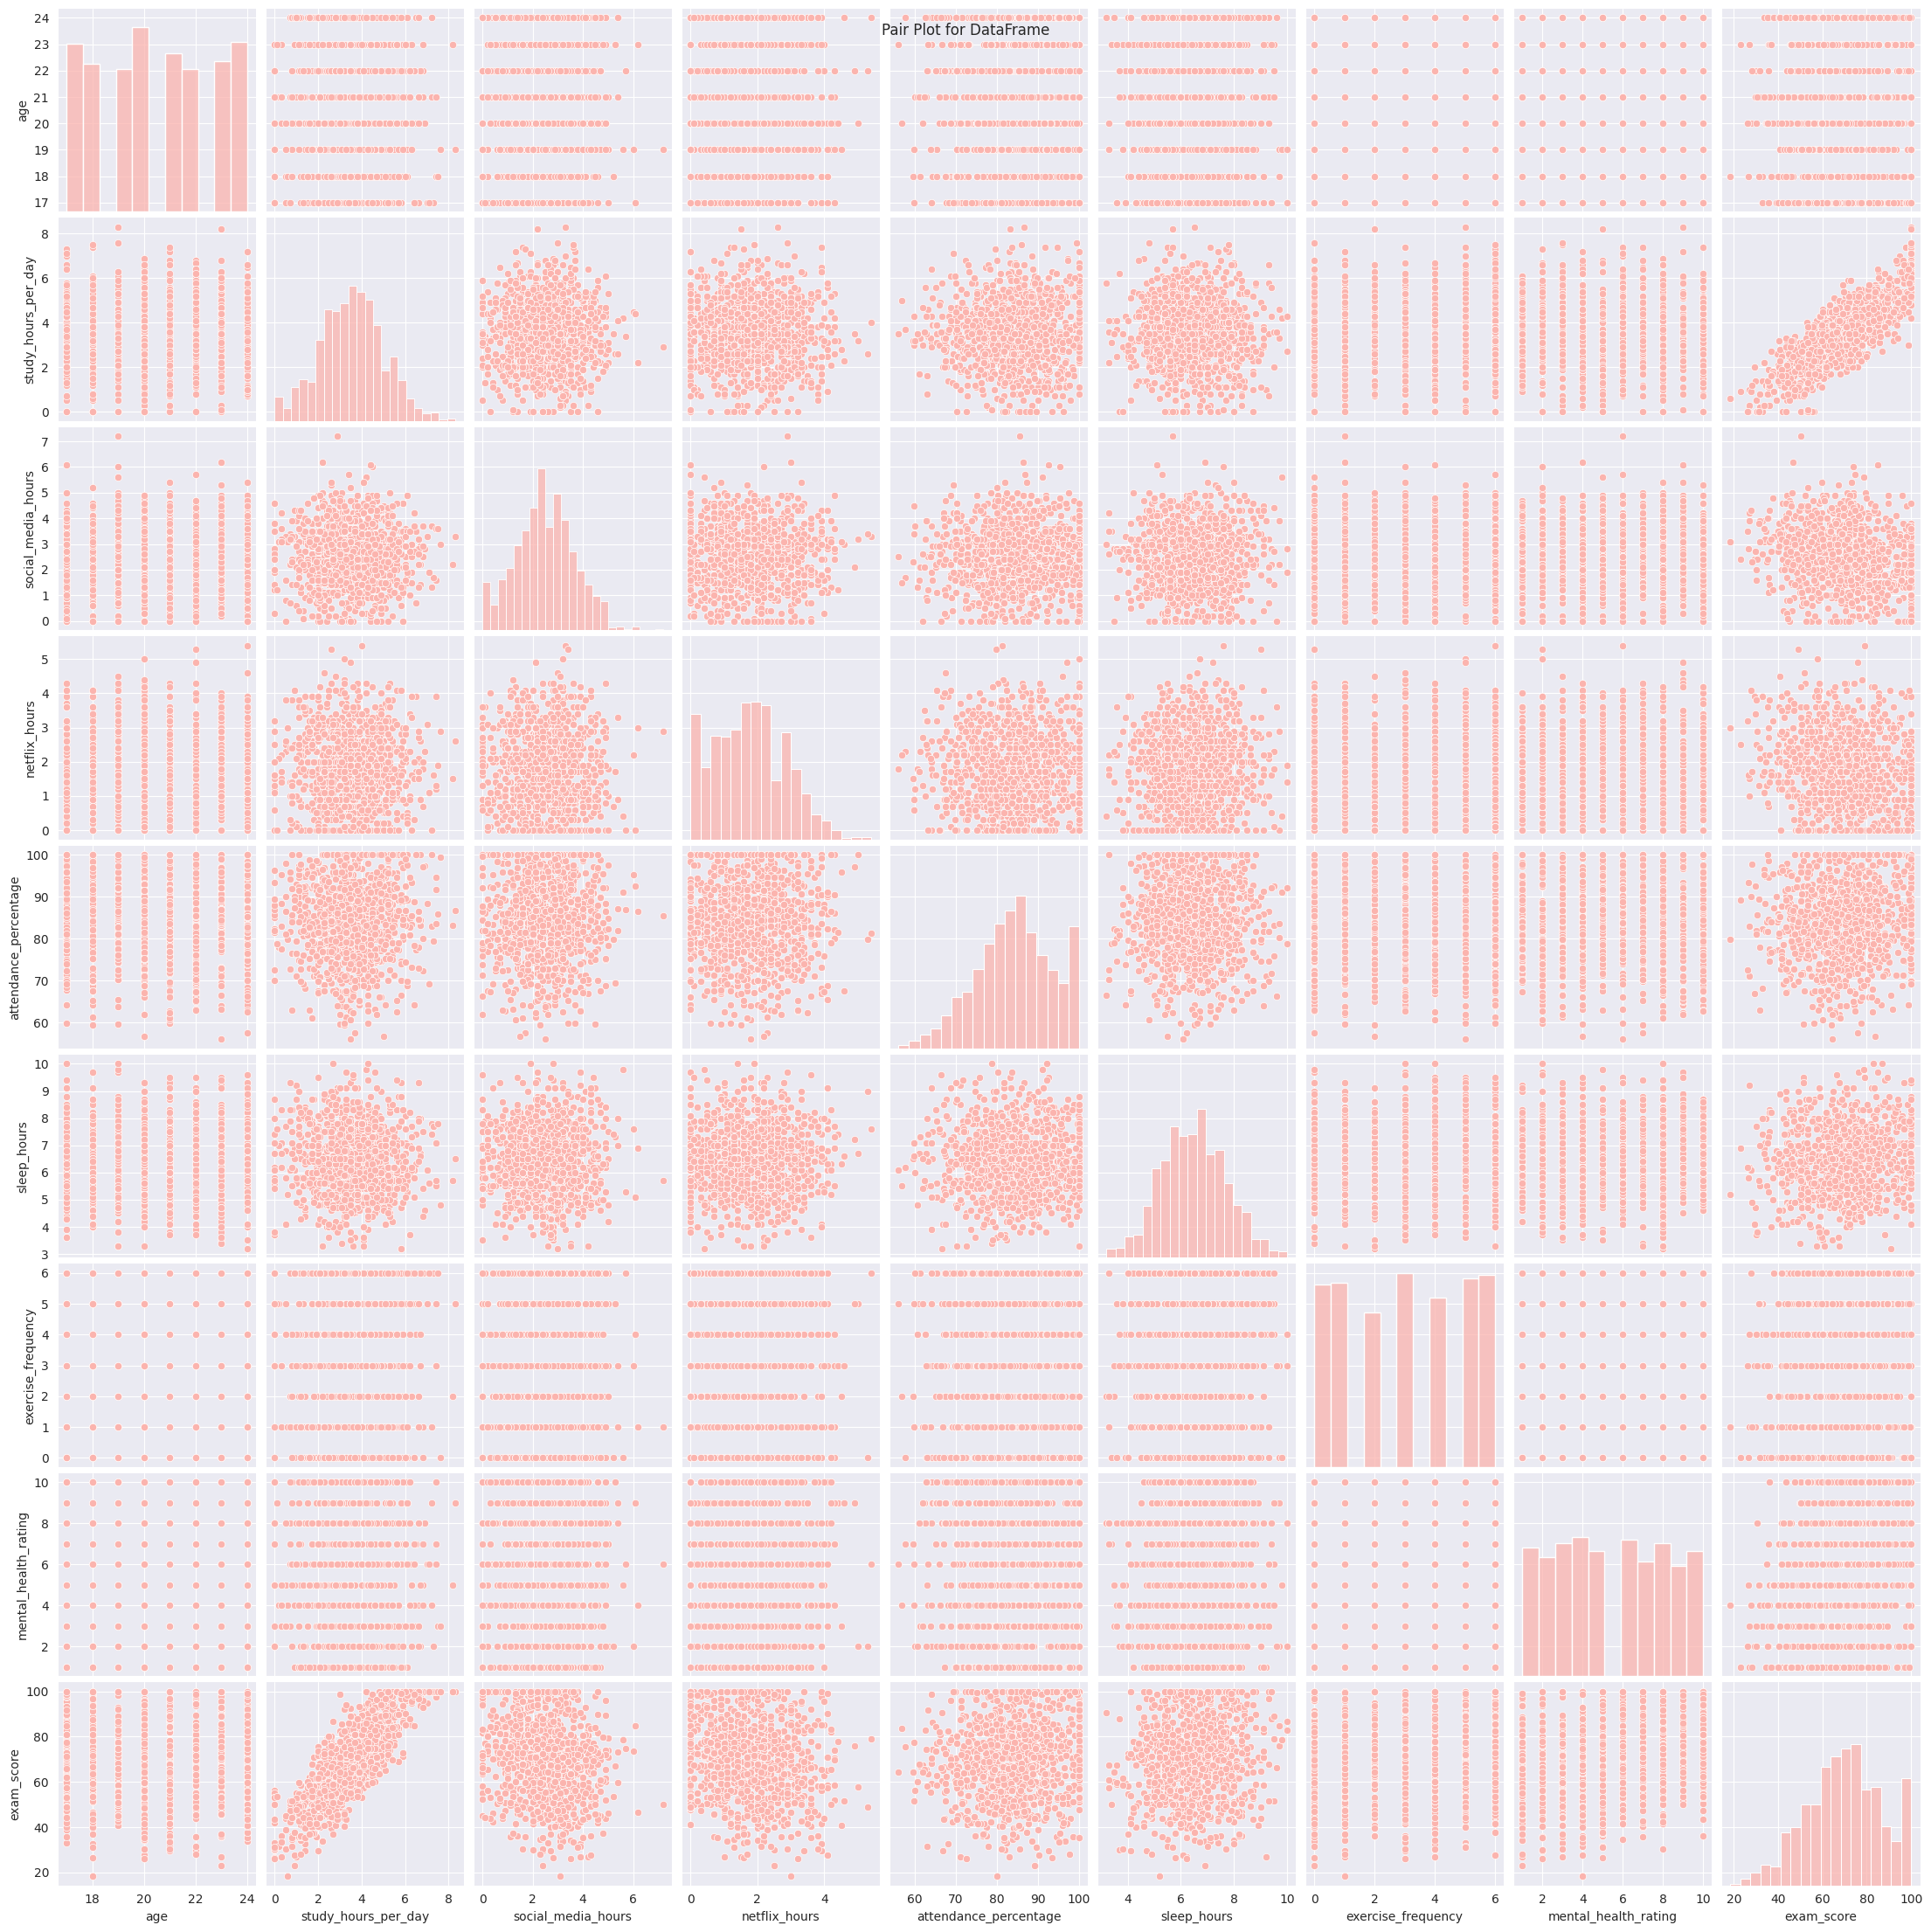

In [113]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

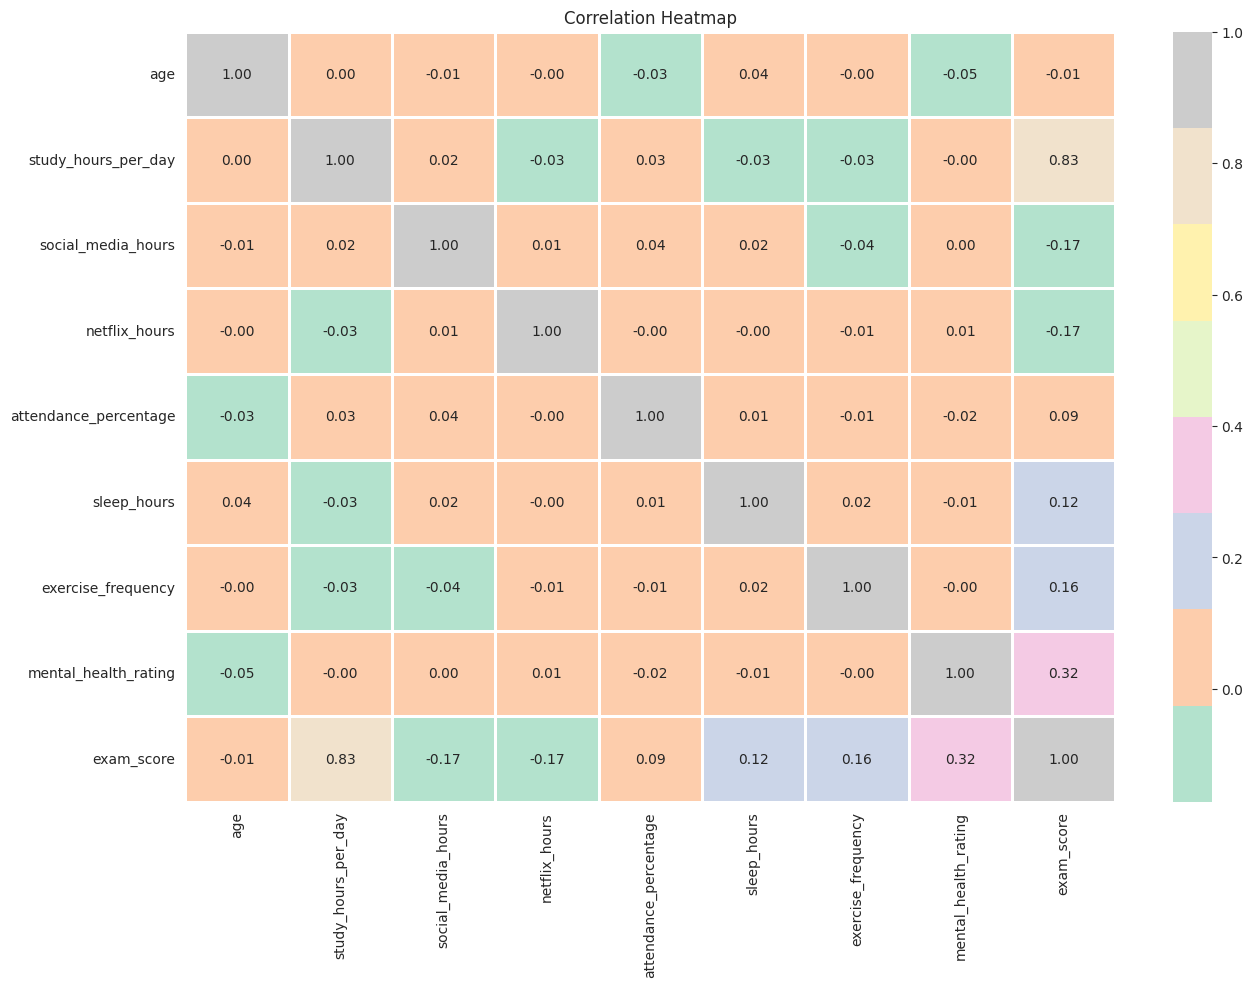

In [114]:
plt.figure(figsize=(15, 10))

# Calculate correlation for numerical columns only
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

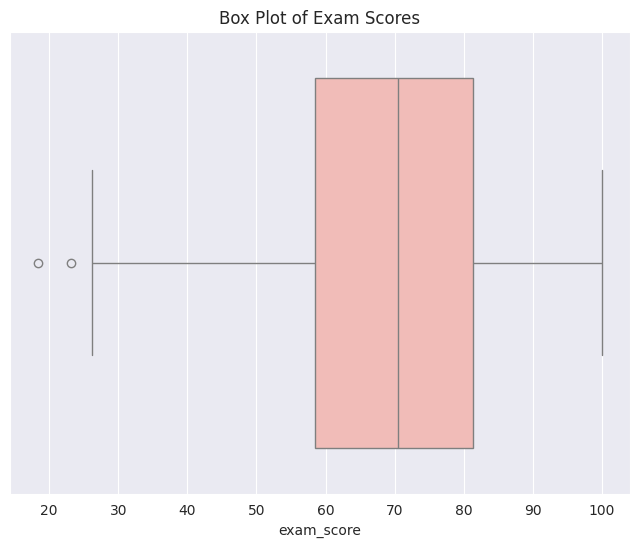

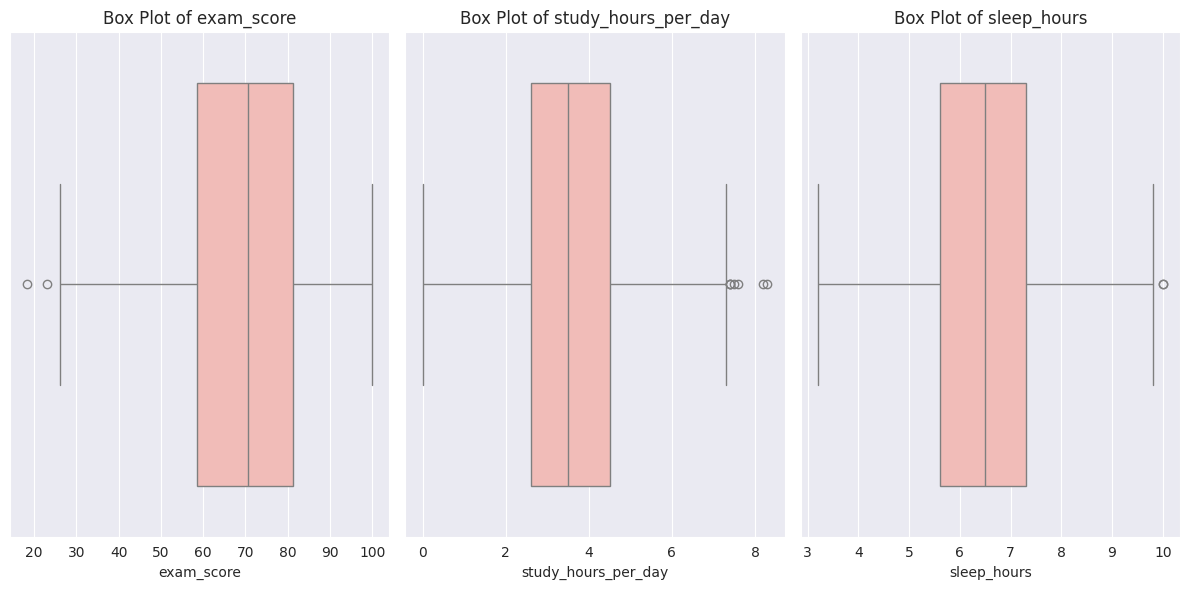

In [123]:
# prompt: tolong buatkan visualisasi dengan blox plot untuk meiliha adanya outlier

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you want to check for outliers in 'exam_score'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['exam_score'])
plt.title('Box Plot of Exam Scores')
plt.show()

# Example for multiple columns:
numerical_cols = ['exam_score', 'study_hours_per_day', 'sleep_hours'] # Replace with your numerical columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# data prepocessing

In [115]:
X = df.drop(['student_id', 'exam_score'], axis=1)  # student_id bukan fitur yang berguna
y = df['exam_score']

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                    'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

categorical_features = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
                        'internet_quality', 'extracurricular_participation']

# Pipeline untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
# Pipeline lengkap
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',  LinearRegression())
])

model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('regressor', LinearRegression())])

In [125]:
from sklearn.linear_model import Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Menggunakan Ridge Regression
])

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
print(f'train dataset {X_train.shape} {y_train.shape}')
print(f'test dataset {X_test.shape} {y_test.shape}')

ridge_pipeline.fit(X_train, y_train)
print(f'train dataset {X_train.shape} {y_train.shape}')
print(f'test dataset {X_test.shape} {y_test.shape}')


train dataset (800, 14) (800,)
test dataset (200, 14) (200,)
train dataset (800, 14) (800,)
test dataset (200, 14) (200,)


In [129]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("linier model \nMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

y_pred = ridge_pipeline.predict(X_test)

print("ridge model \nMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


linier model 
MSE: 26.47623645496918
R2 Score: 0.8967502640380202
ridge model 
MSE: 26.481163364502677
R2 Score: 0.8967310505025425


In [120]:
import numpy as np

# Dapetin fitur setelah OneHotEncoding + Scaling
feature_names = numeric_features + list(
    model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
)

# Koefisien
coefficients = model.named_steps['regressor'].coef_

# Gabungkan dan urutkan
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

print(importance_df.head(10))  # Top 10 fitur


                         Feature  Coefficient
1            study_hours_per_day    14.144736
7           mental_health_rating     5.564302
2             social_media_hours    -3.133815
6             exercise_frequency     2.656236
3                  netflix_hours    -2.534400
5                    sleep_hours     2.421586
4          attendance_percentage     1.359685
11             diet_quality_Good    -0.958356
15  parental_education_level_nan    -0.839483
9                   gender_Other     0.810709


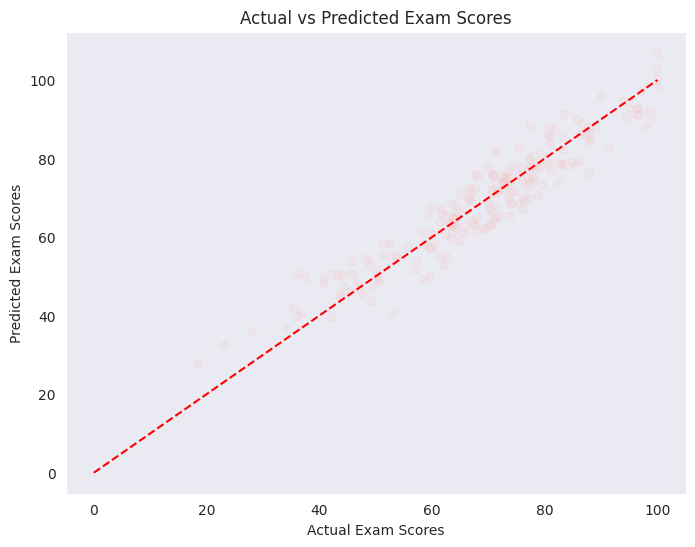

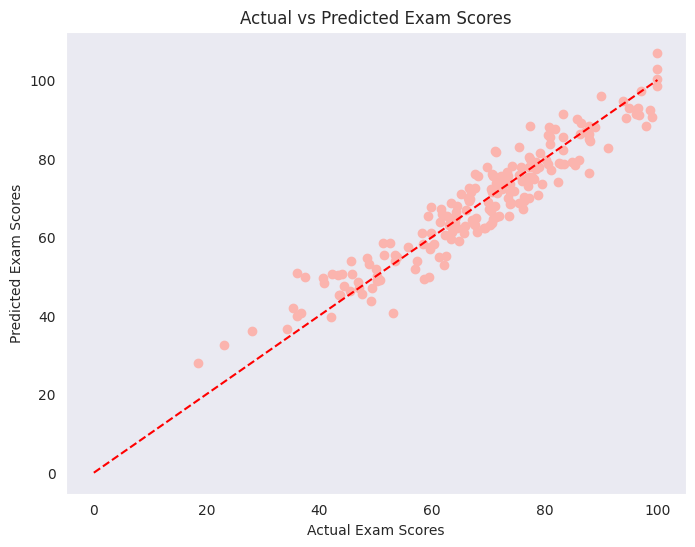

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.10)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=1)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([0, 100], [0, 100], 'r--')
plt.grid()
plt.show()
